In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#  Loading csv file into pandas dataframe

data=pd.read_csv('data.csv')

In [3]:
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
data.shape

(2227, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [6]:
data.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


# Checking for null values

In [7]:
# Checking for null values

data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

<AxesSubplot:xlabel='x1', ylabel='Density'>

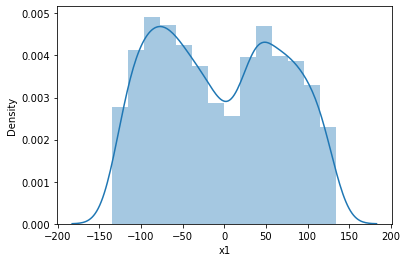

In [8]:
sns.distplot(data['x1'])

<AxesSubplot:xlabel='x2', ylabel='Density'>

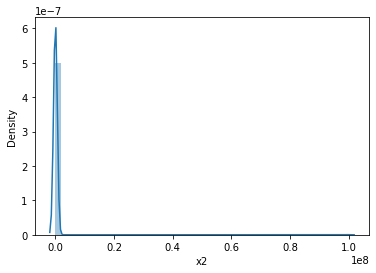

In [9]:
sns.distplot(data['x2'])

# Replacing nul values with median

In [10]:
# replacing 

data['x1']=data['x1'].fillna(data['x1'].median())
data['x2']=data['x2'].fillna(data['x2'].median())

In [11]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

# Checking for outliers

<AxesSubplot:xlabel='x1'>

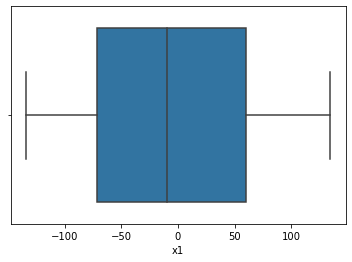

In [12]:
sns.boxplot(data['x1'])

<AxesSubplot:xlabel='x2'>

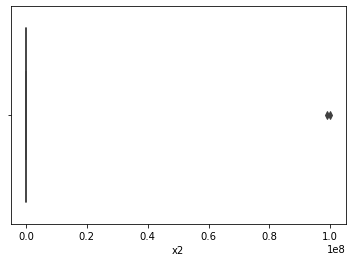

In [13]:
sns.boxplot(data['x2'])

# Treating outliers

In [14]:
Q1,Q3 = np.percentile(data['x2'],[25,75])
IQR = Q3 - Q1
LB = Q1 - (1.5 * IQR)
UB = Q3 + (1.5 * IQR)
data['x2']=data['x2'].apply(lambda x:data['x2'].median()  if (x > UB)|(x < LB) else x)

<AxesSubplot:xlabel='x2'>

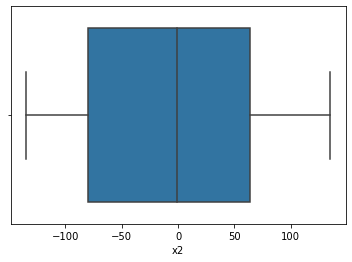

In [15]:
sns.boxplot(data['x2'])

<AxesSubplot:xlabel='x2', ylabel='Density'>

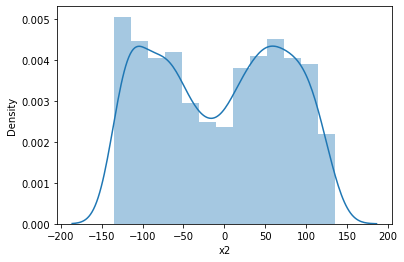

In [16]:
sns.distplot(data['x2'])

# Visualization of data

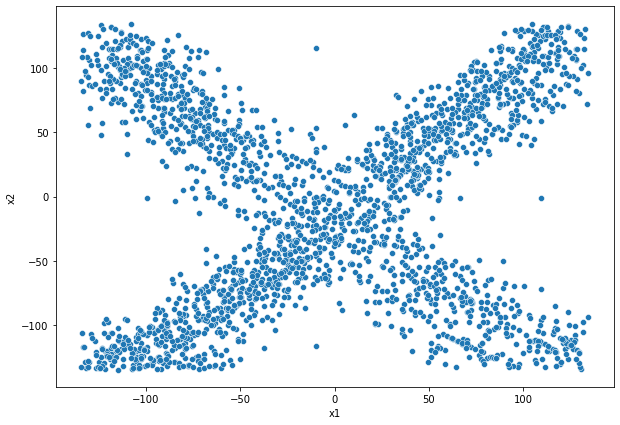

In [17]:
plt.figure(figsize=(10,7))
sns.scatterplot(data['x1'],data['x2'])
plt.show()

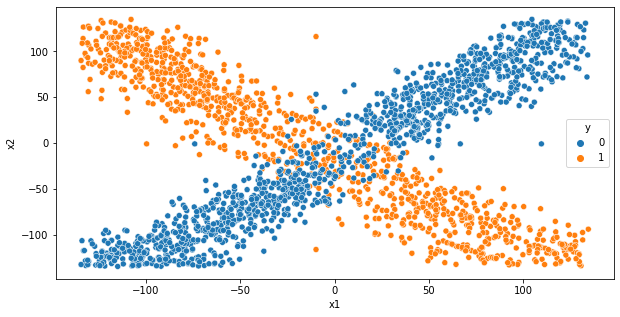

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(data['x1'],data['x2'],hue=data['y'])
plt.show()

<AxesSubplot:xlabel='y', ylabel='count'>

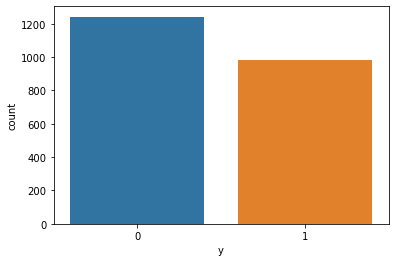

In [19]:
sns.countplot(data['y'])

<AxesSubplot:>

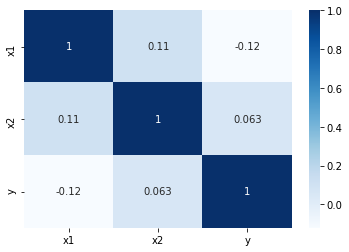

In [20]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')

# Splitting of data

In [21]:
from sklearn.model_selection import train_test_split

X = data.drop('y',axis=1)
y = data['y']

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X=scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [22]:
print(x_train.shape,y_train.shape)

(1781, 2) (1781,)


In [23]:
print(x_test.shape,y_test.shape)

(446, 2) (446,)


In [24]:
performance=pd.DataFrame(index=['Accuracy','Precision','Recall','F1-score'])

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

Logistic_model = LogisticRegression()

Logistic_model.fit(x_train,y_train)

y_pred = Logistic_model.predict(x_test)

In [26]:
Logistic_model.score(x_test,y_test)

0.7488789237668162

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score,accuracy_score

In [28]:
confusion_matrix(y_test,y_pred)

array([[254,   0],
       [112,  80]], dtype=int64)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       254
           1       1.00      0.42      0.59       192

    accuracy                           0.75       446
   macro avg       0.85      0.71      0.70       446
weighted avg       0.83      0.75      0.72       446



In [30]:
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('f1-score: ',f1_score(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test,y_pred))

Precision:  1.0
Recall:  0.4166666666666667
f1-score:  0.5882352941176471
Accuracy:  0.7488789237668162


In [31]:
performance['Logistic Regression']=[accuracy_score(y_test,y_pred),
                                    precision_score(y_test,y_pred),
                                    recall_score(y_test,y_pred),
                                   f1_score(y_test,y_pred)]

# SVM with linear kernel

In [32]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear',probability=True)

svm_model.fit(x_train,y_train)

y_pred = svm_model.predict(x_test)

In [33]:
confusion_matrix(y_test,y_pred)

array([[254,   0],
       [120,  72]], dtype=int64)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       254
           1       1.00      0.38      0.55       192

    accuracy                           0.73       446
   macro avg       0.84      0.69      0.68       446
weighted avg       0.82      0.73      0.70       446



In [35]:
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('f1-score: ',f1_score(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test,y_pred))

Precision:  1.0
Recall:  0.375
f1-score:  0.5454545454545454
Accuracy:  0.7309417040358744


In [36]:
performance['SVM with linear kernel']=[accuracy_score(y_test,y_pred),
                                    precision_score(y_test,y_pred),
                                    recall_score(y_test,y_pred),
                                   f1_score(y_test,y_pred)]

# SVM with RBF kernel

In [37]:
svm_rbf_model = SVC(kernel='rbf',probability=True)

svm_rbf_model.fit(x_train,y_train)

y_pred = svm_rbf_model.predict(x_test)

In [38]:
confusion_matrix(y_test,y_pred)

array([[241,  13],
       [  9, 183]], dtype=int64)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       254
           1       0.93      0.95      0.94       192

    accuracy                           0.95       446
   macro avg       0.95      0.95      0.95       446
weighted avg       0.95      0.95      0.95       446



In [40]:
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('f1-score: ',f1_score(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test,y_pred))

Precision:  0.9336734693877551
Recall:  0.953125
f1-score:  0.9432989690721649
Accuracy:  0.9506726457399103


In [41]:
performance['SVM with rbf kernel']=[accuracy_score(y_test,y_pred),
                                    precision_score(y_test,y_pred),
                                    recall_score(y_test,y_pred),
                                   f1_score(y_test,y_pred)]

# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(x_train,y_train)

y_pred = dt_model.predict(x_test)

In [43]:
confusion_matrix(y_test,y_pred)

array([[236,  18],
       [ 12, 180]], dtype=int64)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       254
           1       0.91      0.94      0.92       192

    accuracy                           0.93       446
   macro avg       0.93      0.93      0.93       446
weighted avg       0.93      0.93      0.93       446



In [45]:
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('f1-score: ',f1_score(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test,y_pred))

Precision:  0.9090909090909091
Recall:  0.9375
f1-score:  0.923076923076923
Accuracy:  0.9327354260089686


In [46]:
performance['Decision Tree']=[accuracy_score(y_test,y_pred),
                                    precision_score(y_test,y_pred),
                                    recall_score(y_test,y_pred),
                                   f1_score(y_test,y_pred)]

# KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(x_train,y_train)

y_pred = knn_model.predict(x_test)

In [48]:
confusion_matrix(y_test,y_pred)

array([[241,  13],
       [  9, 183]], dtype=int64)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       254
           1       0.93      0.95      0.94       192

    accuracy                           0.95       446
   macro avg       0.95      0.95      0.95       446
weighted avg       0.95      0.95      0.95       446



In [50]:
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('f1-score: ',f1_score(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test,y_pred))

Precision:  0.9336734693877551
Recall:  0.953125
f1-score:  0.9432989690721649
Accuracy:  0.9506726457399103


In [51]:
performance['KNN']=[accuracy_score(y_test,y_pred),
                                    precision_score(y_test,y_pred),
                                    recall_score(y_test,y_pred),
                                   f1_score(y_test,y_pred)]

In [52]:
performance

,Logistic Regression,SVM with linear kernel,SVM with rbf kernel,Decision Tree,KNN
Accuracy,0.748879,0.730942,0.950673,0.932735,0.950673
Precision,1.000000,1.000000,0.933673,0.909091,0.933673
Recall,0.416667,0.375000,0.953125,0.937500,0.953125
F1-score,0.588235,0.545455,0.943299,0.923077,0.943299


In [53]:
performance_with_hyperparameters=pd.DataFrame(index=['Accuracy','Precision','Recall','F1-score'])

# Hyperparameter Tuning

## Logistic Regression

In [54]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=LogisticRegression(),param_distributions={'penalty':['l1', 'l2', 'elasticnet', 'none'],
                                                                                       'C':np.linspace(0,5,100),
                                                                                       'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
                                   scoring='accuracy',cv=5,random_state=1)

result = random_search.fit(X,y)

In [55]:
result.best_params_

{'solver': 'newton-cg', 'penalty': 'none', 'C': 0.5555555555555556}

In [56]:
logistic_tuned_model = result.best_estimator_

logistic_tuned_model.fit(x_train,y_train)

y_pred = logistic_tuned_model.predict(x_test)

In [57]:
confusion_matrix(y_test,y_pred)

array([[254,   0],
       [112,  80]], dtype=int64)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       254
           1       1.00      0.42      0.59       192

    accuracy                           0.75       446
   macro avg       0.85      0.71      0.70       446
weighted avg       0.83      0.75      0.72       446



In [59]:
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('f1-score: ',f1_score(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test,y_pred))

Precision:  1.0
Recall:  0.4166666666666667
f1-score:  0.5882352941176471
Accuracy:  0.7488789237668162


In [60]:
performance_with_hyperparameters['logistic regression']=[accuracy_score(y_test,y_pred),
                                    precision_score(y_test,y_pred),
                                    recall_score(y_test,y_pred),
                                   f1_score(y_test,y_pred)]

# SVM with linear kernel

In [61]:
random_search = RandomizedSearchCV(estimator=SVC(kernel='linear',probability=True),param_distributions={'gamma':['scale', 'auto'],
                                                                                       'C':np.linspace(0,5,100)},
                                   scoring='accuracy',cv=5,random_state=1)

result = random_search.fit(X,y)

In [62]:
result.best_params_

{'gamma': 'scale', 'C': 1.4646464646464645}

In [63]:
linear_svm_tuned_model = result.best_estimator_

linear_svm_tuned_model.fit(x_train,y_train)

y_pred = linear_svm_tuned_model.predict(x_test)

In [64]:
confusion_matrix(y_test,y_pred)

array([[254,   0],
       [120,  72]], dtype=int64)

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       254
           1       1.00      0.38      0.55       192

    accuracy                           0.73       446
   macro avg       0.84      0.69      0.68       446
weighted avg       0.82      0.73      0.70       446



In [66]:
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('f1-score: ',f1_score(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test,y_pred))

Precision:  1.0
Recall:  0.375
f1-score:  0.5454545454545454
Accuracy:  0.7309417040358744


In [67]:
performance_with_hyperparameters['SVM with linear kernel']=[accuracy_score(y_test,y_pred),
                                    precision_score(y_test,y_pred),
                                    recall_score(y_test,y_pred),
                                   f1_score(y_test,y_pred)]

# SVM with rbf kernel

In [68]:
random_search = RandomizedSearchCV(estimator=SVC(kernel='rbf',probability=True),param_distributions={'gamma':['scale', 'auto'],
                                                                                       'C':np.linspace(0,5,100)},
                                   scoring='accuracy',cv=5,random_state=1)

result = random_search.fit(X,y)

In [69]:
result.best_params_

{'gamma': 'scale', 'C': 0.10101010101010101}

In [70]:
svm_rbf_tuned_model = result.best_estimator_

svm_rbf_tuned_model.fit(x_train,y_train)

y_pred = svm_rbf_tuned_model.predict(x_test)

In [71]:
confusion_matrix(y_test,y_pred)

array([[252,   2],
       [ 24, 168]], dtype=int64)

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       254
           1       0.99      0.88      0.93       192

    accuracy                           0.94       446
   macro avg       0.95      0.93      0.94       446
weighted avg       0.95      0.94      0.94       446



In [73]:
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('f1-score: ',f1_score(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test,y_pred))

Precision:  0.9882352941176471
Recall:  0.875
f1-score:  0.9281767955801106
Accuracy:  0.9417040358744395


In [74]:
performance_with_hyperparameters['SVM with rbf kernel']=[accuracy_score(y_test,y_pred),
                                    precision_score(y_test,y_pred),
                                    recall_score(y_test,y_pred),
                                   f1_score(y_test,y_pred)]

# Decision Tree

In [75]:
random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions={'criterion':["gini", "entropy"],
                                                                                           'splitter':["best", "random"],
                                                                                           'max_depth':[1,2,3,4,5,7,9,10,15,20,25,30,35,50],
                                                                                           'min_samples_split':[2,5,10,15,20,25,30],
                                                                                           'min_samples_leaf':[5,7,9,11,15,21,25,35,55],
                                                                                           'max_features':["auto", "sqrt", "log2",None]
                                                                                           },
                                   scoring='accuracy',cv=5,random_state=1)

result = random_search.fit(X,y)

In [76]:
result.best_params_

{'splitter': 'best',
 'min_samples_split': 30,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 25,
 'criterion': 'gini'}

In [77]:
dt_tuned_model = result.best_estimator_

dt_tuned_model.fit(x_train,y_train)

y_pred = dt_tuned_model.predict(x_test)

In [78]:
confusion_matrix(y_test,y_pred)

array([[241,  13],
       [ 20, 172]], dtype=int64)

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       254
           1       0.93      0.90      0.91       192

    accuracy                           0.93       446
   macro avg       0.93      0.92      0.92       446
weighted avg       0.93      0.93      0.93       446



In [80]:
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('f1-score: ',f1_score(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test,y_pred))

Precision:  0.9297297297297298
Recall:  0.8958333333333334
f1-score:  0.9124668435013263
Accuracy:  0.9260089686098655


In [81]:
performance_with_hyperparameters['Decision tree']=[accuracy_score(y_test,y_pred),
                                    precision_score(y_test,y_pred),
                                    recall_score(y_test,y_pred),
                                   f1_score(y_test,y_pred)]

# KNN

In [82]:
random_search = RandomizedSearchCV(estimator=KNeighborsClassifier(),param_distributions={'n_neighbors':[3,5,7,9,11,15,21,25,35],
                                                                                         'weights':['uniform', 'distance']
                                                                                           },
                                   scoring='accuracy',cv=5,random_state=1)

result = random_search.fit(X,y)

In [83]:
result.best_params_

{'weights': 'distance', 'n_neighbors': 9}

In [84]:
knn_tuned_model = result.best_estimator_

knn_tuned_model.fit(x_train,y_train)

y_pred = knn_tuned_model.predict(x_test)

In [85]:
confusion_matrix(y_test,y_pred)

array([[240,  14],
       [ 11, 181]], dtype=int64)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       254
           1       0.93      0.94      0.94       192

    accuracy                           0.94       446
   macro avg       0.94      0.94      0.94       446
weighted avg       0.94      0.94      0.94       446



In [87]:
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('f1-score: ',f1_score(y_test,y_pred))
print('Accuracy: ',accuracy_score(y_test,y_pred))

Precision:  0.9282051282051282
Recall:  0.9427083333333334
f1-score:  0.9354005167958657
Accuracy:  0.9439461883408071


In [88]:
performance_with_hyperparameters['KNN']=[accuracy_score(y_test,y_pred),
                                    precision_score(y_test,y_pred),
                                    recall_score(y_test,y_pred),
                                   f1_score(y_test,y_pred)]

In [89]:
performance

,Logistic Regression,SVM with linear kernel,SVM with rbf kernel,Decision Tree,KNN
Accuracy,0.748879,0.730942,0.950673,0.932735,0.950673
Precision,1.000000,1.000000,0.933673,0.909091,0.933673
Recall,0.416667,0.375000,0.953125,0.937500,0.953125
F1-score,0.588235,0.545455,0.943299,0.923077,0.943299


In [90]:
performance_with_hyperparameters

,logistic regression,SVM with linear kernel,SVM with rbf kernel,Decision tree,KNN
Accuracy,0.748879,0.730942,0.941704,0.926009,0.943946
Precision,1.000000,1.000000,0.988235,0.929730,0.928205
Recall,0.416667,0.375000,0.875000,0.895833,0.942708
F1-score,0.588235,0.545455,0.928177,0.912467,0.935401


# Observations:

1. SVM with rbf kernel and knn models gives me better than other models.
2. After hyperparameter tuning, knn gives better accuracy,presicionand f1-score than other models. SVM with rbf kernel gives me better recall than all other models